In [100]:
#Importing all libraries 

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from statsmodels.tsa.arima_model import ARMA
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from statsmodels.tsa.stattools import arma_order_select_ic


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from math import sqrt

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Check for stationarity

In [3]:
series = Series.from_csv('Stationary3.csv', header=0)
series=series.dropna()
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.825894
p-value: 0.000049
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [4]:
#Parasing Data set
d = pd.read_csv('Stationary3.csv')
d=d.dropna()
d.to_csv('!@#.csv')

In [5]:
d['Date'] = pd.to_datetime(d['Date']) 

In [6]:
d.set_index('Date', inplace = True)
d

,Level
Date,
1921-01-01,-1.392103
1921-02-01,-1.494680
1921-03-01,-1.293204
1921-04-01,-0.338961
1921-05-01,-0.061502
1921-06-01,-0.277062
1921-07-01,-0.331201
1921-08-01,-0.527297
1921-09-01,-0.377867


<Figure size 1440x576 with 0 Axes>

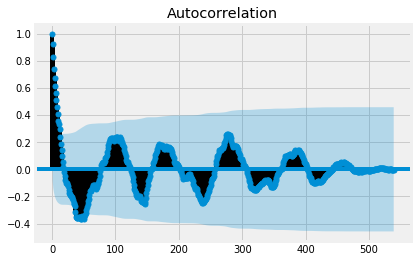

In [11]:
#Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(20,8))
plot_acf(d)

plt.show()

Text(0.5,1,'Partial Autocorrelation of Residuals')

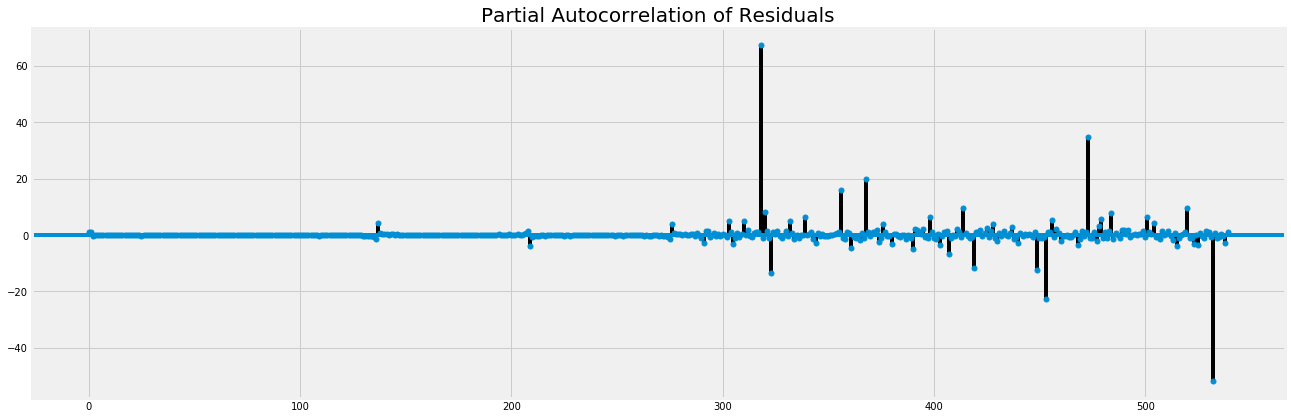

In [12]:
#Partial Autocorrelation Plot
from pandas import DataFrame, concat
series = DataFrame(d)
import seaborn as sns
plt.figure(figsize=(20,15))
plt.subplot(211)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, ax=plt.gca())
plt.title('Partial Autocorrelation of Residuals',fontsize=20)


In [15]:
Level = pd.read_csv('lake.csv')
Level=Level.dropna()


In [16]:
Level['Month'] = pd.to_datetime(Level['Month']) 
Level.set_index('Month', inplace = True)
Level

,Levels
Month,
1921-01-01,14.763
1921-02-01,14.649
1921-03-01,15.085
1921-04-01,16.376
1921-05-01,16.926
1921-06-01,16.774
1921-07-01,16.490
1921-08-01,15.769
1921-09-01,15.180


In [17]:
model = ARMA(d, order=(2, 0))
results = model.fit(trend='c', method='css-mle')
print(results.summary())
RSS= np.sum((results.resid)**2)
print(RSS)

                              ARMA Model Results                              
Dep. Variable:                  Level   No. Observations:                  540
Model:                     ARMA(2, 0)   Log Likelihood                -311.859
Method:                       css-mle   S.D. of innovations              0.430
Date:                Mon, 03 Dec 2018   AIC                            631.718
Time:                        14:08:46   BIC                            648.885
Sample:                    01-01-1921   HQIC                           638.432
                         - 12-01-1965                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0008      0.209     -0.004      0.997      -0.410       0.408
ar.L1.Level     1.1300      0.042     26.918      0.000       1.048       1.212
ar.L2.Level    -0.2175      0.042     -5.172    

In [18]:
resultq = seasonal_decompose(Level, model='multiplicative')
t=resultq.trend
s=resultq.seasonal
r=resultq.resid
print(resultq.trend)
print(resultq.seasonal)
print(resultq.resid)
print(resultq.observed)

               Levels
Month                
1921-01-01        NaN
1921-02-01        NaN
1921-03-01        NaN
1921-04-01        NaN
1921-05-01        NaN
1921-06-01        NaN
1921-07-01  15.401625
1921-08-01  15.309917
1921-09-01  15.195292
1921-10-01  15.099625
1921-11-01  15.033208
1921-12-01  14.992917
1922-01-01  14.970792
1922-02-01  14.961250
1922-03-01  14.973083
1922-04-01  14.995250
1922-05-01  14.977083
1922-06-01  14.898833
1922-07-01  14.822958
1922-08-01  14.770000
1922-09-01  14.713875
1922-10-01  14.619000
1922-11-01  14.483000
1922-12-01  14.344625
1923-01-01  14.219708
1923-02-01  14.099542
1923-03-01  13.974625
1923-04-01  13.860792
1923-05-01  13.773042
1923-06-01  13.747750
...               ...
1968-07-01  16.512500
1968-08-01  16.522792
1968-09-01  16.544917
1968-10-01  16.585250
1968-11-01  16.688833
1968-12-01  16.829583
1969-01-01  16.985375
1969-02-01  17.150625
1969-03-01  17.298458
1969-04-01  17.423417
1969-05-01  17.531750
1969-06-01  17.632125
1969-07-01

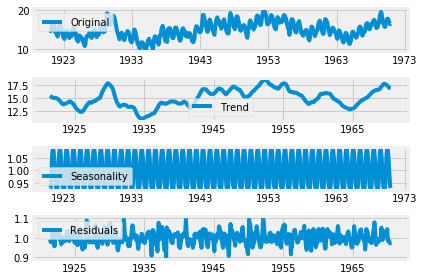

In [19]:
plt.subplot(411)
plt.plot(Level, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(t, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(s, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(r, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

In [20]:
series = Series.from_csv('MainFinalForecasting.csv', header=0)
series=series.dropna()


<Figure size 1440x576 with 0 Axes>

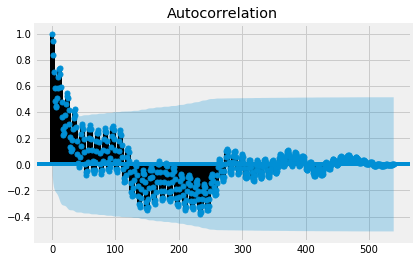

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(20,8))
plot_acf(series)

plt.show()

Text(0.5,1,'Partial Autocorrelation')

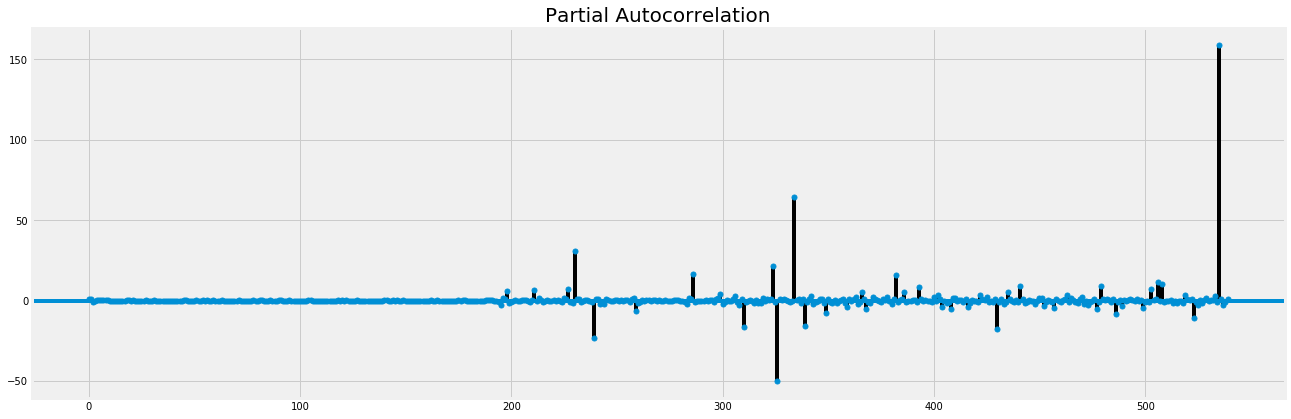

In [22]:
from pandas import DataFrame, concat
series = DataFrame(series )
import seaborn as sns
plt.figure(figsize=(20,15))
plt.subplot(211)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, ax=plt.gca())
plt.title('Partial Autocorrelation',fontsize=20)


In [23]:
df = pd.read_csv('FinalForecasting.csv', index_col=0,
                 parse_dates=True, infer_datetime_format=True)
df.head(5)
df=df.dropna()

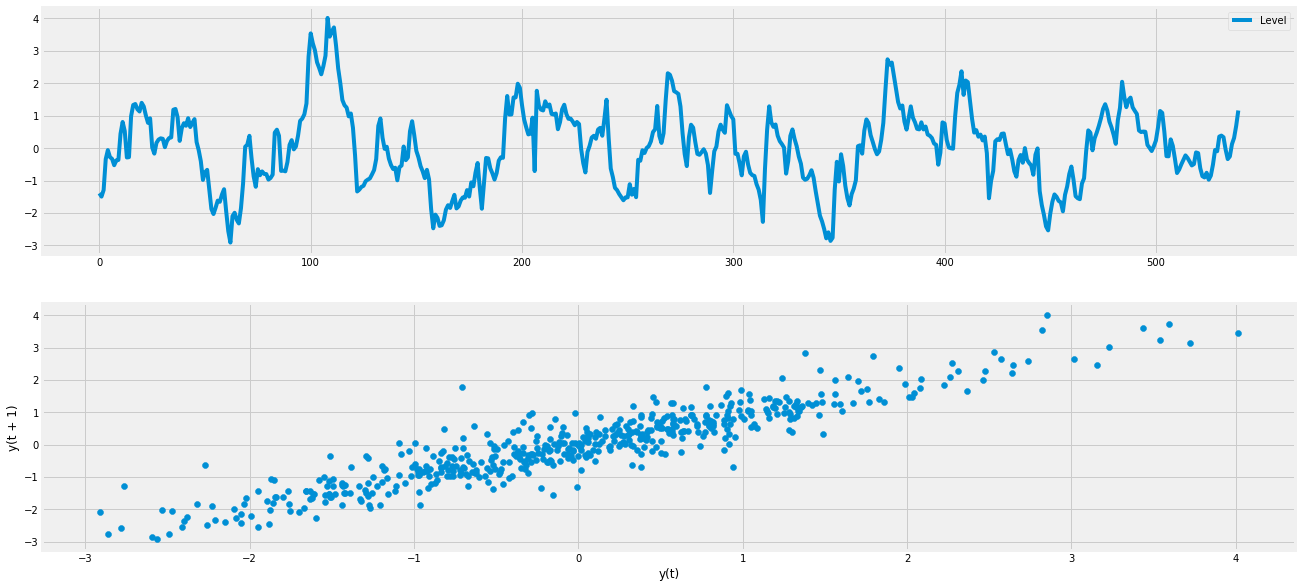

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
df.plot(ax=ax1) # series plot
pd.plotting.lag_plot(df['Level'])

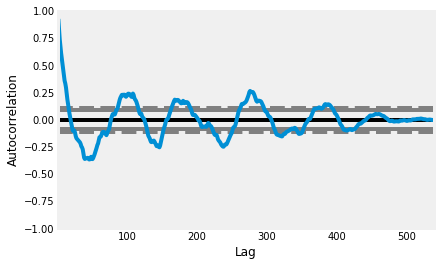

In [25]:
pd.plotting.autocorrelation_plot(df['Level'])

# ARMA MODELING

In [26]:
model = ARMA(d, order=(2, 1))
results = model.fit(trend='c', method='css-mle')
print(results.summary())
RSS= np.sum((results.resid)**2)
print(RSS)

                              ARMA Model Results                              
Dep. Variable:                  Level   No. Observations:                  540
Model:                     ARMA(2, 1)   Log Likelihood                -311.326
Method:                       css-mle   S.D. of innovations              0.430
Date:                Mon, 03 Dec 2018   AIC                            632.652
Time:                        14:09:05   BIC                            654.110
Sample:                    01-01-1921   HQIC                           641.044
                         - 12-01-1965                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0014      0.215     -0.007      0.995      -0.422       0.419
ar.L1.Level     0.9764      0.156      6.242      0.000       0.670       1.283
ar.L2.Level    -0.0751      0.147     -0.512    

In [27]:
model = ARMA(d, order=(4, 3))
results = model.fit(trend='nc', method='mle')
print(results.summary())
RSS= np.sum((results.resid)**2)
print(RSS)

                              ARMA Model Results                              
Dep. Variable:                  Level   No. Observations:                  540
Model:                     ARMA(4, 3)   Log Likelihood                -310.245
Method:                           mle   S.D. of innovations              0.429
Date:                Mon, 03 Dec 2018   AIC                            636.490
Time:                        14:09:06   BIC                            670.823
Sample:                    01-01-1921   HQIC                           649.918
                         - 12-01-1965                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.Level     0.7714      0.578      1.335      0.182      -0.361       1.904
ar.L2.Level     0.3501      0.454      0.770      0.441      -0.540       1.241
ar.L3.Level    -0.2347      0.359     -0.653    

In [28]:
model = ARMA(d, order=(2, 0))
results = model.fit(trend='nc', method='css')
print(results.summary())
RSS= np.sum((results.resid)**2)
print(RSS)

                              ARMA Model Results                              
Dep. Variable:                  Level   No. Observations:                  540
Model:                     ARMA(2, 0)   Log Likelihood                -309.873
Method:                           css   S.D. of innovations              0.430
Date:                Mon, 03 Dec 2018   AIC                            625.747
Time:                        14:09:07   BIC                            638.611
Sample:                    03-01-1921   HQIC                           630.779
                         - 12-01-1965                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.Level     1.1293      0.042     26.809      0.000       1.047       1.212
ar.L2.Level    -0.2176      0.042     -5.171      0.000      -0.300      -0.135
                                    Roots       

In [29]:
model = ARMA(d, order=(1, 0))
results = model.fit(trend='nc', method='css')
print(results.summary())
RSS= np.sum((results.resid)**2)
print(RSS)

                              ARMA Model Results                              
Dep. Variable:                  Level   No. Observations:                  540
Model:                     ARMA(1, 0)   Log Likelihood                -323.129
Method:                           css   S.D. of innovations              0.441
Date:                Mon, 03 Dec 2018   AIC                            650.258
Time:                        14:09:08   BIC                            658.837
Sample:                    02-01-1921   HQIC                           653.613
                         - 12-01-1965                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.Level     0.9276      0.016     57.795      0.000       0.896       0.959
                                    Roots                                    
                  Real          Imaginary         

# Prediction


In [30]:
#When train and test are 80% and 20% respectively

In [31]:
X = d.values
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	model = ARMA(history, order=(2,0)) #using manually selected paratments
	model_fit = model.fit(trend='nc', method='css-mle')
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
print(model_fit.summary())

RMSE: 0.335
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  539
Model:                     ARMA(2, 0)   Log Likelihood                -311.237
Method:                       css-mle   S.D. of innovations              0.430
Date:                Mon, 03 Dec 2018   AIC                            628.473
Time:                        14:09:13   BIC                            641.342
Sample:                             0   HQIC                           633.507
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.1283      0.042     26.859      0.000       1.046       1.211
ar.L2.y       -0.2161      0.042     -5.137      0.000      -0.299      -0.134
                                    Root

In [32]:
#When train and test are 90% and 10% respectively

In [33]:
X = d.values
X = X.astype('float32')
train_size = int(len(X) * 0.90)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	model = ARMA(history, order=(2,0)) #using manually selected paratments
	model_fit = model.fit(trend='nc', method='css-mle')
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
print(model_fit.summary())

RMSE: 0.264
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  539
Model:                     ARMA(2, 0)   Log Likelihood                -311.237
Method:                       css-mle   S.D. of innovations              0.430
Date:                Mon, 03 Dec 2018   AIC                            628.473
Time:                        14:09:17   BIC                            641.342
Sample:                             0   HQIC                           633.507
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.1283      0.042     26.859      0.000       1.046       1.211
ar.L2.y       -0.2161      0.042     -5.137      0.000      -0.299      -0.134
                                    Root

In [34]:
d= Series.from_csv('Stationary3.csv',header=0)
d=d.dropna()
X = d.values
X = X.astype('float32')
train_size = int(len(X) * 0.95)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	model = ARMA(history, order=(2,0)) #using manually selected paratments
	model_fit = model.fit(trend='nc', method='css-mle')
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
print(model_fit.summary())

RMSE: 0.242
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  539
Model:                     ARMA(2, 0)   Log Likelihood                -311.237
Method:                       css-mle   S.D. of innovations              0.430
Date:                Mon, 03 Dec 2018   AIC                            628.473
Time:                        14:09:17   BIC                            641.342
Sample:                             0   HQIC                           633.507
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.1283      0.042     26.859      0.000       1.046       1.211
ar.L2.y       -0.2161      0.042     -5.137      0.000      -0.299      -0.134
                                    Root

In [35]:
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=-0.428315, expected=-0.365346
predicted=-0.303531, expected=-0.224067
predicted=-0.174382, expected=-0.304934
predicted=-0.295552, expected=-0.420493
predicted=-0.408445, expected=-0.533994
predicted=-0.511656, expected=-0.492035
predicted=-0.440207, expected=-0.132830
predicted=-0.044568, expected=-0.155366
predicted=-0.146600, expected=-0.620615
predicted=-0.665608, expected=-0.865072
predicted=-0.841990, expected=-0.904693
predicted=-0.834414, expected=-0.760257
predicted=-0.663096, expected=-0.974049
predicted=-0.935139, expected=-0.848635
predicted=-0.748150, expected=-0.510565
predicted=-0.393802, expected=-0.056761
predicted=0.045744, expected=-0.097535
predicted=-0.097745, expected=0.355771
predicted=0.421728, expected=0.385429
predicted=0.358057, expected=0.335020
predicted=0.294920, expected=-0.045938
predicted=-0.123534, expected=-0.338686
predicted=-0.371934, expected=-0.256243
predicted=-0.216059, expected=0.123231
predicted=0.194016, expected=0.312832
predicted=

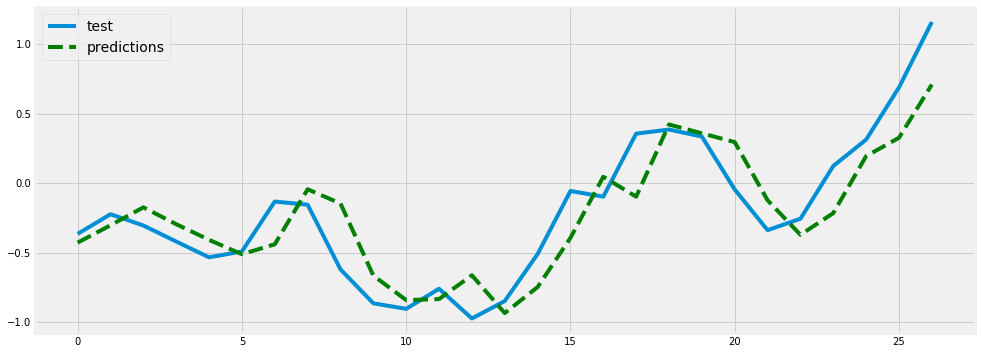

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(test,label='test')
plt.plot(predictions, color='green',linestyle='--',label='predictions')
plt.legend(fontsize=14)
plt.show()

# Walk forward over time steps in test in next workbook
